# Profitable App Profiles for the App Store and Google Play Markets

In this project, an **introductory data analysis** is made towards a better understanding of **Android** and **iOS mobile apps** on the **Google Play** and the **App Store markets**, respectively, aiming to identify **tendencies** and **correlations** between app's attributes and their **profitability**. By doing that, the extracted knowledge may be useful to consolidate a strategic approach, taken by a company, for **developing an app** with certain attributes, that lead to an higher expected profitability on the two considered markets.


### Primary Restraints to the App Attributes for Development 

As restraints, this analysis only takes into account **unpaid apps** (free to download and install), thus making the in-app ads the main source of revenue. As a consequence, the profitability of an app is mostly influenced by the number of its users (directly proportional to users' engagement). Additionally, it's imposed an idiom constraint, being directed to an **English-speaking audience**. 

These considerations set the **data analysis' rhetoric goal**: what type of apps are likely to attract more users on Google Play and the App Store, taking as constraints their price (must be free) and idiom (English)?


### Data Methodology Overview

To achieve the analysis purposes, it's necessary to collect and analyze data about mobile apps available on Google Play and the App Store, which satisfies the specified **primary restraints**. This composes the **data methodology** for validating an app idea, with its subsequent development and availability on the Google Play and the App Store, being comprised in the following way:
- 1.**Opening and Structuring the Data**
- 2.**Data Cleaning**
- 3.**Data Analysis** 

The final results are essentially suited for companies that align with the free and English-speaking directed apps market. Nevertheless, the adopted methodology can be adapted for paid and non-English directed apps.

To minimize risks and overhead, the **validation strategy** for an app idea is comprised of three steps:
- Building a minimal Android version of the app, and adding it to Google Play;
- If the app has a good response from users, it's further developed;
- If the app is profitable after six months, an iOS version of the app is built and added to the App Store.

## 1. Opening and Structuring the Data

For attending the set goals, it was decided to proceed with the analysis of two extensively studied **data sets**, that are available on the **Kaggle website**. For an in-depth insight about the both **data sets' attributes**, nominated by the **headers** on the respective **csv files**, check [Google Play Store Apps dataset documentation](https://www.kaggle.com/lava18/google-play-store-apps) and [Apple Store Apps dataset documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

After downloading the two considered data sets and posteriorly saving to the same directory as this **jupyter notebook**, both were imported to the present **notebook environment**. As both data sets are in the **csv format**, the usage of the **csv package** built in **Python** can be useful. On this package, exists two widely used methods that structure the input data (that is, organize its content): `Reader` and `DictReader`. For the purpose of a more intuitive data manipulation, as the headers are anticipally known, the subroutine `DictReader` was used, structuring each row of the csv file as an independent dictionary. In order to aggroup the data into one element, the rows on the csv file were condensed as dictionaries on a list, being formally referred as a **list of dictionaries**. 

The resulted **data structure** (**list of dictionaries**) allows the data search to be dependent on csv file's headers, as they are the keys of each dictionary on the list. 

In [1]:
from csv import DictReader
with open("AppleStore.csv") as file_apple_apps:
    read_apple_apps = DictReader(file_apple_apps)
    apple_apps = list(read_apple_apps)

with open("googleplaystore.csv") as file_google_apps:
    read_google_apps = DictReader(file_google_apps)
    google_apps = list(read_google_apps)

### Data Exploration

Intending to **visualize** the resulted **data structure**, as well as to perform some **metrics** (calculating the **number of apps** - number of rows on the csv file - and the **number of headers** - number of columns on the csv file -, on both datasets), a function was designed - `explore_data()` -, allowing the abstraction of the conceived algorithm and repetitive code minimization.   

The `explore_data()` function takes in six parameters:
- `dataset`, which is expected to be a **list of dictionaries**;
- `start` and `end` (two independent parameters), which are both expected to be **integers**, representing the **starting** and the **ending indices** of a **slice** from the **data set**, that is intended to isolate the exploratory visualization;
- `additional_info`, which is expected to be a **boolean variable**, having **False** has its **default argument**. If set to **True**, prints the number of rows and columns of the data set;
- `attribute_view`, which is expected to be an **attribute** that **selects the value to be displayed**, having **None** has its **default argument**, that is, all of the app's attributes are displayed;
- `attribute_selection`, which is expected to be an **attribute** that **selects the applications to be visually explored**, having **None** has its **default argument**, that is, there isn't any imposed condition to the apps being explored.

In [104]:
def explore_data(dataset, dataset_flag, start, end, attribute_view = None, attribute_selection = None, additional_info = False):
    if dataset_flag == "google":
        name_app = "App"
    elif dataset_flag == "apple":
        name_app = "track_name"
    
    dataset_delimited = dataset[start:end]
    
    for data in dataset_delimited: 
        if attribute_selection != None and attribute_selection in data.values():
            print(data[name_app] + ": " + data[attribute_view])
            
        elif attribute_selection == None and attribute_view != None:
            print(data[name_app] + ": " + data[attribute_view])

        elif attribute_selection == None and attribute_view == None:
            print(data)
            print('\n')
    
    if additional_info:
        print("Number of rows in the entire dataset are " + str(len(dataset)))
        print("Number of dataset headers are " + str(len(dataset[0])) + "\n")

In [3]:
print("Explorying Apple Store Apps dataset:")
explore_data(apple_apps, 0, 10, additional_info = True)
      
print("Explorying Google Play Store Apps dataset:")
explore_data(google_apps, 0, 10, additional_info = True)

Explorying Apple Store Apps dataset:
{'rating_count_ver': '212', 'cont_rating': '4+', 'ver': '95.0', 'sup_devices.num': '37', 'prime_genre': 'Social Networking', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '3.5', 'rating_count_tot': '2974676', 'user_rating': '3.5', 'currency': 'USD', 'track_name': 'Facebook', 'ipadSc_urls.num': '1', 'size_bytes': '389879808', 'vpp_lic': '1', 'id': '284882215'}


{'rating_count_ver': '1289', 'cont_rating': '12+', 'ver': '10.23', 'sup_devices.num': '37', 'prime_genre': 'Photo & Video', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '4.0', 'rating_count_tot': '2161558', 'user_rating': '4.5', 'currency': 'USD', 'track_name': 'Instagram', 'ipadSc_urls.num': '0', 'size_bytes': '113954816', 'vpp_lic': '1', 'id': '389801252'}


{'rating_count_ver': '579', 'cont_rating': '9+', 'ver': '9.24.12', 'sup_devices.num': '38', 'prime_genre': 'Games', 'price': '0.0', 'lang.num': '18', 'user_rating_ver': '4.5', 'rating_count_tot': '2130805', 'user_rating':

## 2. Data Cleaning

At this point, both **data sets** include the overall apps that were available on the Google Play and App Store at the time they were collected, existing the possibility that they contain data that doesn't meet the **primary restraints** to app attributes: must be free to download and install, as well as directed towards an English-speaking audience. Additionally, it may exist other inconsistencies (**duplicate entries** and partially **omitted data** in some entries) that affect the **analysis accuracy**. 

Thus, before beginning the **data analysis step**, it's necessary to pre-process the data (formally called **data cleaning**) in order to fit the purpose of the data analysis to be made.

Overall, the **data cleaning** process being performed includes the following steps:
- **2.1** Data Errors Analysis
- **2.2** Duplicates' Detection, Correctness and/or Removal
- **2.3** English and Free Apps Isolation 

### 2.1 Data Errors Analysis 

As the **first step** to the **data cleaning process**, it was conceived a way to **detect** possible **errors** on the data set's **correct correspondence between their attributes and respective values**. 

Recalling the **data sets documentation**, it was decided to **categorize their attributes** (nominated by its headers) based on **data type and its convertibility to float type**. The attributes that allowed this conversion were grouped to an array that includes numerical data types as well as strings that are convertible to the float data type - `num_data` array -, with the remaining being grouped to other array - `string_data` array -, that is, strings that aren't convertible to the float data type. These arrays are created by a function - `data_error()` -, which can be tunned for a specific data set by **two input parameters**: `dataset` - list of dictionaries - and `dataset_flag` - string that can have two possible forms, "google" or "apple". Posteriorly, the said **convertibility to float type test** is seperately performed by other function - `float_type()` -, which takes as input argument the said arrays. Additionally, was imposed a **constraint to the apps' rating attribute**: their maximum range must be 5.0. 

As a result of the **iterative process** for **algorithm optimization**, additional code was conceived to **detect entries that have intentional missing data**, denoted by **None** or **''"** - empty string. This could be due to unreported data on the Google Play and App Store at the time it was collected. As a means of consistently signaling these occurrences on the data set, the respective values were replaced by None (at the cases that previously were empty strings - ''), being this reported on the terminal as **None or empty string**. 

Based on the **categorization of the apps' attributes for both data sets**, as well as the imposed constraint to the **apps' rating maximum range**, any **app's attributes** that **doesn't align** with these **designed rules** is recognized, by the algorithm, as a **possible error** on the respective data set, reporting the exact occurrence of the error (app's and attribute's names to whom those errors are relative, as well as the respective row on the data set).

The same described algorithm returns as **output** an array - `app_error` - with the rows of the detected error occurrences in the data set.

In [4]:
def float_type(data):
    try:
        float(data)
        error = False
        
    except:
        error = True
        
    return error 

def data_error(dataset, dataset_flag):
    error_total = True
    
    if dataset_flag == "google":
        string_data = ["Category", "Genres", "Content Rating", "Last Uptated", "Apps", "Type", "Size"]
        num_data = ['Rating']
        key_rating = 'Rating'
        name_app = 'App'
                
    elif dataset_flag == "apple":
        string_data = ['cont_rating', 'prime_genre', 'currency']
        num_data = ['rating_count_ver', 'sup_devices.num', 'price', 'lang.num', 'user_rating_ver', 'rating_count_tot', 
                    'user_rating', 'ipadSc_urls.num', 'size_bytes', 'vpp_lic', 'id']
        key_rating = 'user_rating'
        name_app = 'track_name'
        
    app_error = []    
    for app in dataset:
        for key, value in app.items():
            error = False
            
            if key in string_data:
                error = not(float_type(value))
                    
            elif key in num_data:
                error = float_type(value)

                if not(error) and (key == key_rating and (float(value) > 5.0)):
                    error = True
                    
            if value == None or value == '':
                value = "None or empty string"
                app[key] = None
                error = True
                
                
            if error:   
                print(key + ": " + value)
                print("Incorrectness in the " + str(dataset.index(app)) + " ith row in the dataset, relative to the \'" + 
                      app[name_app] + "\' app.\n")
                error_total = False
                
                
                if dataset.index(app) in app_error:
                    continue
                    
                app_error.append(dataset.index(app))
    
    
    if error_total:
        print("It wasn't found any error in the dataset.")
    
    return app_error

In [5]:
print("Apple Store Apps dataset:")
apple_error = data_error(apple_apps, "apple")

print("\nGoogle Play Store Apps dataset:")
google_error = data_error(google_apps, "google")

Apple Store Apps dataset:
It wasn't found any error in the dataset.

Google Play Store Apps dataset:
Current Ver: None or empty string
Incorrectness in the 1553 ith row in the dataset, relative to the 'Market Update Helper' app.

Type: NaN
Incorrectness in the 9148 ith row in the dataset, relative to the 'Command & Conquer: Rivals' app.

Category: 1.9
Incorrectness in the 10472 ith row in the dataset, relative to the 'Life Made WI-Fi Touchscreen Photo Frame' app.

Rating: 19
Incorrectness in the 10472 ith row in the dataset, relative to the 'Life Made WI-Fi Touchscreen Photo Frame' app.

Content Rating: None or empty string
Incorrectness in the 10472 ith row in the dataset, relative to the 'Life Made WI-Fi Touchscreen Photo Frame' app.

Android Ver: None or empty string
Incorrectness in the 10472 ith row in the dataset, relative to the 'Life Made WI-Fi Touchscreen Photo Frame' app.

Type: 0
Incorrectness in the 10472 ith row in the dataset, relative to the 'Life Made WI-Fi Touchscreen 

### Data Inspection for Insertion and Deletion

To better comprehend the reported errors, it will be inspected the entire data structure and distribution of the apps to whom those errors are relative. This will help to capture a deepened understanding of the reasons behind those errors, and, possibly, identify others. 

In [6]:
for i in google_error:
    print ("Entire " + str(i) + " ith app data information:")
    print(google_apps[i])
    print('\n')

Entire 1553 ith app data information:
{'Category': 'LIBRARIES_AND_DEMO', 'Rating': '4.1', 'Genres': 'Libraries & Demo', 'Content Rating': 'Everyone', 'Installs': '1,000,000+', 'Last Updated': 'February 12, 2013', 'App': 'Market Update Helper', 'Android Ver': '1.5 and up', 'Reviews': '20145', 'Current Ver': None, 'Type': 'Free', 'Price': '0', 'Size': '11k'}


Entire 9148 ith app data information:
{'Category': 'FAMILY', 'Rating': 'NaN', 'Genres': 'Strategy', 'Content Rating': 'Everyone 10+', 'Installs': '0', 'Last Updated': 'June 28, 2018', 'App': 'Command & Conquer: Rivals', 'Android Ver': 'Varies with device', 'Reviews': '0', 'Current Ver': 'Varies with device', 'Type': 'NaN', 'Price': '0', 'Size': 'Varies with device'}


Entire 10472 ith app data information:
{'Category': '1.9', 'Rating': '19', 'Genres': 'February 11, 2018', 'Content Rating': None, 'Installs': 'Free', 'Last Updated': '1.0.19', 'App': 'Life Made WI-Fi Touchscreen Photo Frame', 'Android Ver': None, 'Reviews': '3.0M', 'C

Given the apps to which the reported errors are related, it was searched on the Google Play Store if the missing or correct information was available. 

For the **'Market Update Helper' app**, it was confirmed that its current version (**'Current Ver'** attribute) information is **missing**, so it will **remain empty** on the dataset (with the **None** flag as an alert for posterior analysis), instead of deleting its entire data, relevant for the propose of statistical analyses. 

For the **'Command & Conquer: Rivals' app**, it was confirmed that perhaps on the moment that the data was collected for the Google Play Store data set this app could contain unreported data (it was new, and statistics weren't perhaps yet available). On the 22nd June of 2020, the missing data or actualized data was available, so it was decided to proceed with **data insertion**. 

In [39]:
app = google_apps[9148]
app['Rating'] = '3.8'
app['Installs'] = '1,000,000+'
app['Last Updated'] = 'September 26, 2019'
app['Reviews'] = '127819'

print(google_apps[9148])

{'Category': 'FAMILY', 'Rating': '3.8', 'Genres': 'Strategy', 'Content Rating': 'Everyone 10+', 'Installs': '1,000,000+', 'Last Updated': 'September 26, 2019', 'App': 'Command & Conquer: Rivals', 'Android Ver': 'Varies with device', 'Reviews': '127819', 'Current Ver': 'Varies with device', 'Type': 'NaN', 'Price': '0', 'Size': 'Varies with device'}


For the **'Life Made WI-Fi Touchscreen Photo Frame' app**, after inspecting its entire data it was concluded that many **properties' values are swapped**, being already reported in [kaggle](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) that this is due to the **omission** of the value corresponding to the **'Category' column** (equivalent to the 'Category' key in the respective dictionary), in the original csv file. The mentioned caused a shift of one column to the left for all the remaining values, and consequently an incorrect correspondence between Key and its correct Value on the respective dictionary. Due to the inherent **dataset syntax** that isn't totally known by me (one could ignore relevant syntax variants to the correct insertion of data), it was decided to delete this data from the Google Play Store Apps data set.

In [8]:
print(len(google_apps))
del google_apps[10472]
print(len(google_apps))

10841
10840


**WARNING:** For the context of one same running environment of this jupyter notebook, execute only one time the upper cell. If executed more than once, the deletion will be performed on undesired data. 

### 2.2 Duplicates' Detection, Correctness and/or Removal

For the purpose of the statistical analysis to be performed, besides data errors related to data insertion incorrectness on the dataset, the inspection of possible **duplicate entries** of an app in both data sets must be performed. This can be manifested as complete duplicates of an app, with all of their attributes having the exact same values, or with differences in some of those attributes. In this context, the differences may be related with actualizations of data attributes that are mutable with time, like the rating of an app or its downloads, and that were inserted on the data set without previously deleting unactualized data. 

With that being said, it was conceived an algorithm - `search_duplicates()` - that identifies duplicates based on the app's name, in manners that if appears more than once in the data set the app's name is signalized. For purposes of visualization and better comprehension of algorithm performance, it can be accessed, by switching `all_duplicates` Boolean input parameter - True for accessing and False for not -, the **complete list of duplicates** report (returned as **output** to an array - `duplicate_apps`), which are presented in the form of **tuples (app's name, row on the data set)**. Additionally, if one's would like a more concise visualization, an example of a certain complete group of duplicates can be accessed, by switching `example_duplicates` Boolean input parameter - True for accessing and False for not. This process is tunned for a specific data set by **two input parameters**: `dataset` - list of dictionaries - and `dataset_flag` - string that can have two possible forms, "google" or "apple". 

In [9]:
def search_duplicates(dataset, dataset_flag, all_duplicates = False, example_duplicates = True):
    
    if dataset_flag == "google":
        name_app = "App"
    elif dataset_flag == "apple":
        name_app = "track_name"
        
    unique_apps = []
    duplicate_apps = []
    for app in dataset: 
        if  app[name_app] in unique_apps:
            row = dataset.index(app)
            duplicate_apps.append((app[name_app], row))
        else:
            unique_apps.append(app[name_app])
    
    if len(duplicate_apps) != 0:
        print("This dataset has duplicate entries")
        
        if all_duplicates:
            print("\nList of duplicates tuples in the form of (name_duplicate_app, row_dataset)")
            for app in duplicate_apps:
                print(app)
        
        if example_duplicates:
            print("\nDuplicate entries example:\n")
            num_duplicate = 0
            duplicate = duplicate_apps[num_duplicate][0]
            for app in dataset:
                if app[name_app] == duplicate:
                    print(app)
                    print("\n")
    else:
        print("This dataset doesn't have duplicate entries")
    
    return duplicate_apps

In [10]:
print("- Apple Store Apps dataset:")
apple_duplicates = search_duplicates(apple_apps, "apple")

print("\n- Google Play Store Apps dataset:")
google_duplicates = search_duplicates(google_apps, "google")

- Apple Store Apps dataset:
This dataset has duplicate entries

Duplicate entries example:

{'rating_count_ver': '87', 'cont_rating': '9+', 'ver': '1.4', 'sup_devices.num': '37', 'prime_genre': 'Games', 'price': '0.0', 'lang.num': '1', 'user_rating_ver': '3.0', 'rating_count_tot': '668', 'user_rating': '3.0', 'currency': 'USD', 'track_name': 'Mannequin Challenge', 'ipadSc_urls.num': '4', 'size_bytes': '109705216', 'vpp_lic': '1', 'id': '1173990889'}


{'rating_count_ver': '58', 'cont_rating': '4+', 'ver': '1.0.1', 'sup_devices.num': '38', 'prime_genre': 'Games', 'price': '0.0', 'lang.num': '1', 'user_rating_ver': '4.5', 'rating_count_tot': '105', 'user_rating': '4.0', 'currency': 'USD', 'track_name': 'Mannequin Challenge', 'ipadSc_urls.num': '5', 'size_bytes': '59572224', 'vpp_lic': '1', 'id': '1178454060'}



- Google Play Store Apps dataset:
This dataset has duplicate entries

Duplicate entries example:

{'Category': 'BUSINESS', 'Rating': '4.2', 'Genres': 'Business', 'Content Rating'

The number of duplicates can now be accessed by counting the number of elements on the duplicate list generated by the previous algorithm. 

In [11]:
print("- Number of duplicates on the Apple Store Apps dataset:" + str(len(apple_duplicates)))
print("\n- Number of duplicates on the Google Play Store Apps dataset:" + str(len(google_duplicates)))

- Number of duplicates on the Apple Store Apps dataset:2

- Number of duplicates on the Google Play Store Apps dataset:1181


The next procedure is related to the **duplicate entries removal**, keeping only one entry per app. One strategy could be removing the duplicate rows randomly, without criteria. 

Recalling the reasons for these duplicates, the encountered differences may be due to a collection of data on different moments in time. Selecting app's attributes that capture this differentiation would allow a more precise criteria for the deletion of duplicates. 

As the example above, for the **'Quick PDF Scanner + OCR FREE' app** the only difference is related to the number of reviews, captured by the **'Reviews' attribute**. If choosing this criterion for removing the duplicates, the higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, it would only be kept the row with the highest number of reviews and remove the other entries for any given app. For apps that are complete duplicates (have the exact same information), it would only be perserved one of them. 

Reasoning about the possible attributes that capture this differentiation in data collectiveness on a certain moment in time, it was concluded that the **reviews attribute** can be, possibly, the **best one rule criterion**, due to its **incremental nature** (in absence of data entering errors, it can only increase over time) and **high precision to signaling actualizations**. 

With that being said, an **algorithm** was conceived for **deleting duplicates** - `delete_duplicates()` -, based on **maximum review detection** as a criterion - `max_review()` -, being tunned for a specific data set by **two input parameters**: `dataset` - list of dictionaries - and `dataset_flag` - string that can have two possible forms, "google" or "apple". 

In [12]:
def max_review(dataset, dataset_flag):
    
    if dataset_flag == "google":
        reviews = "Reviews" 
        name_app = "App"
    elif dataset_flag == "apple":
        reviews = "rating_count_tot"
        name_app = "track_name"
        
    reviews_max = {}
    
    for app in dataset:
        name = app[name_app]
        n_reviews = int(app[reviews])
        
        if name in reviews_max and (reviews_max[name] <= n_reviews):
            reviews_max[name] = n_reviews
        elif name not in reviews_max:
            reviews_max[name] = n_reviews
            
    return reviews_max

In [13]:
def delete_duplicates(dataset, dataset_flag):
    if dataset_flag == "google":
        reviews = "Reviews"
        name_app = "App"
        
    elif dataset_flag == "apple":
        reviews = "rating_count_tot"
        name_app = "track_name"
    
    reviews_max = max_review(dataset, dataset_flag)
    
    clean_data = []
    added_data = []
    
    for app in dataset:
        name = app[name_app]
        n_reviews = int(app[reviews])
        
        if (n_reviews == reviews_max[name]) and (name not in added_data):
            clean_data.append(app)
            added_data.append(name)
            
    return clean_data 

In [14]:
apple_clean_data = delete_duplicates(apple_apps, "apple")
print("- Apple Store Apps cleaned dataset:")
explore_data(apple_clean_data, 0, 3, additional_info = True)

google_clean_data = delete_duplicates(google_apps, "google")
print("\n- Google Play Store Apps cleaned dataset:")
explore_data(google_clean_data, 0, 3, additional_info = True)

- Apple Store Apps cleaned dataset:
{'rating_count_ver': '212', 'cont_rating': '4+', 'ver': '95.0', 'sup_devices.num': '37', 'prime_genre': 'Social Networking', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '3.5', 'rating_count_tot': '2974676', 'user_rating': '3.5', 'currency': 'USD', 'track_name': 'Facebook', 'ipadSc_urls.num': '1', 'size_bytes': '389879808', 'vpp_lic': '1', 'id': '284882215'}


{'rating_count_ver': '1289', 'cont_rating': '12+', 'ver': '10.23', 'sup_devices.num': '37', 'prime_genre': 'Photo & Video', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '4.0', 'rating_count_tot': '2161558', 'user_rating': '4.5', 'currency': 'USD', 'track_name': 'Instagram', 'ipadSc_urls.num': '0', 'size_bytes': '113954816', 'vpp_lic': '1', 'id': '389801252'}


{'rating_count_ver': '579', 'cont_rating': '9+', 'ver': '9.24.12', 'sup_devices.num': '38', 'prime_genre': 'Games', 'price': '0.0', 'lang.num': '18', 'user_rating_ver': '4.5', 'rating_count_tot': '2130805', 'user_rating': 

### 2.3 English and Free Apps Isolation

### Removing Non-English Apps

Integrating the **primary restraints**, the development of an app directed towards an **English-speaking audience** was highlighted. As a consequence, the statistical analysis must be tuned/finessed for that sub-group of apps encapsulated on a broader group - both data sets of Google Play and App Store. 

Exploring both data sets, some apps' names suggest they aren't directed towards an English-speaking audience, spotted by containing some symbols that aren't commonly used in **English text** — English text usually includes letters from the English alphabet, numbers composed of digits from **0 to 9**, punctuation marks **(., !, ?, ;)**, and other symbols **(+, *, /)**. Thus, as previously said, the intention is to remove these apps. 

In order to conceive the desired algorithm, it's useful to recall how computers process characters. As with everything that is represented and processed by computers, characters are represented by numbers, and, at a more elementary level, on a binary and hexadecimal representation. Different systems of number representation can be reversibly converted into each other, and a more intuitive numeric manipulation for humans is the decimal representation, capturing more concisely the same information as the binary representation. As a standardization, it was conceived the **ASCII (American Standard Code for Information Interchange) system** for characters representation on computers. In this system, the **numbers corresponding to the characters** we commonly use in an **English text** are all in the range **0 to 127**. Based on this number range, we can build an algorithm that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters. For instance, the corresponding number for the character 'a' is 97, character 'A' is 65, and the character '爱' is 29,233. We can get the **corresponding number of each character** using the `ord()` **built-in function**.

Combining with the usage of the `ord()` **built-in function**, the designed algorithm - `inspect_english()` - allows the assessment of each character contained on a given string (app's name to be specified on the `string` **input parameter**), being easily managed since, in Python, strings are indexable and iterable, meaning that is possible to indexing a string in order to select an individual character. As a more automated process, it's equally possible to iterate over a string using a for loop. 

In [15]:
def inspect_english(string): 
    for letter in string:
        if ord(letter) > 127:
            return False
    
    return True

In [16]:
print(inspect_english('Docs To Go™ Free Office Suite'))
print(inspect_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False


TypeError: ord() expected a character, but string of length 3 found

The conceived algorithm supposively abstracted the mentioned considerations for non-English app names detection, but, as demonstrated by two examples, the said algorithm couldn't correctly identify certain English app names. This is because emojis and characters, like ™, fall outside the **ASCII range** and have corresponding numbers over 127. 

Reflecting about what has been verified, if the algorithm is maintained as it is, useful data will be excluded, since many English apps will be incorrectly labeled as non-English. To minimize the impact of data loss, the algorithm will be modified for including a wider filter for the detection of English apps, being achieved by setting a **threshold** - `max_special_chr` **input parameter** - of how many characters can fall outside the English accepted range on the **ASCII system**. If the **threshold** is **overcome**, the app is considered an **non-English app**. 

On the modified algorithm, the **threshold** is tunable, regulating the effectiveness of non-English apps removal. 

In [17]:
def inspect_english(string, max_special_chr):
    num_special_chr = 0 
    
    for letter in string:
        if ord(letter) > 127:
            num_special_chr += 1
    
    if num_special_chr > max_special_chr:
        return False
    
    return True

In [18]:
print(inspect_english('Docs To Go™ Free Office Suite', 5))
print(inspect_english('Instachat 😜', 5))

print(ord('™'))
print(ord('😜'))

True
True


TypeError: ord() expected a character, but string of length 3 found

For automating this process of isolating English-speaking apps, it was designed an algorithm - `english_apps()` -, tunnable for a certain data set by **two input parameters**: `dataset` - list of dictionaries - and `dataset_flag` - string that can have two possible forms, "google" or "apple". Once again, the **threshold** applied on the `inspect_english()` algorithm is specified on the `max_special_chr` **input parameter**.

In [19]:
def english_apps(dataset, dataset_flag, max_special_chr):
    if dataset_flag == "google":
        name_app = "App"
        
    elif dataset_flag == "apple":
        name_app = "track_name"
    
    english_list = []
    for app in dataset:
        name = app[name_app]
        
        if inspect_english(name, max_special_chr):
            english_list.append(app)
            
    return english_list 

In [20]:
total_apple = len(apple_clean_data)
apple_english = english_apps(apple_clean_data, "apple", 3)
len_apple_english = len(apple_english)
print("- For Apple dataset it were eliminated " + str(total_apple - len_apple_english) + " apps classified as non-english.\n")
explore_data(apple_english, 0, 3, True)

total_google = len(google_clean_data)
google_english = english_apps(google_clean_data, "google", 3)
len_google_english = len(google_english)
print("\n- For Google dataset it were eliminated " + str(total_google - len_google_english) + " apps classified as non-english.\n")
explore_data(google_english, 0, 3, True)

- For Apple dataset it were eliminated 1097 apps classified as non-english.

{'rating_count_ver': '212', 'cont_rating': '4+', 'ver': '95.0', 'sup_devices.num': '37', 'prime_genre': 'Social Networking', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '3.5', 'rating_count_tot': '2974676', 'user_rating': '3.5', 'currency': 'USD', 'track_name': 'Facebook', 'ipadSc_urls.num': '1', 'size_bytes': '389879808', 'vpp_lic': '1', 'id': '284882215'}


{'rating_count_ver': '1289', 'cont_rating': '12+', 'ver': '10.23', 'sup_devices.num': '37', 'prime_genre': 'Photo & Video', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '4.0', 'rating_count_tot': '2161558', 'user_rating': '4.5', 'currency': 'USD', 'track_name': 'Instagram', 'ipadSc_urls.num': '0', 'size_bytes': '113954816', 'vpp_lic': '1', 'id': '389801252'}


{'rating_count_ver': '579', 'cont_rating': '9+', 'ver': '9.24.12', 'sup_devices.num': '38', 'prime_genre': 'Games', 'price': '0.0', 'lang.num': '18', 'user_rating_ver': '4.5', 'rati

### Isolating the Free Apps

As mentioned in the introduction, the **primary restraints** for an app to be developded include that it must be free to download and install, thus consisting the in-app ads the main source of revenue. Both data sets contain free and non-free apps, emmerging the need for isolating only the free apps for the matter of an accurate analysis, tuned for the delineated market strategic. 

This data cleaning process can be abstrated by an algorithm - `free_apps()` -, by acknowledging that each data set consists of a **list of dictionaries**, each of which is related to an app, and having categorized its attributes as pairs of key-values (attribute and corresponding value). One of this attribute/key is its **price**, signalated as **free by '0' (Google Play data set) or '0.0'** (Apple Store data set). This allows an easy and effective way of isolating the free apps, that will be returned as **output** - `free_apps`. This process is tunned for a specific data set by **two input parameters**: `dataset` - list of dictionaries - and `dataset_flag` - string that can have two possible forms, "google" or "apple". 

In [21]:
def free_apps(dataset, dataset_flag):
    if dataset_flag == "google":
        price = "Price"
        free = "0"
        
    elif dataset_flag == "apple":
        price = "price"
        free = "0.0"
        
    free_apps = []
    for app in dataset:
        price_app = app[price]
        
        if price_app == free:
            free_apps.append(app)
     
    return free_apps

In [22]:
apple_free_apps = free_apps(apple_english, "apple")
len_apple_free = len(apple_free_apps)
print("- For Apple dataset it were eliminated " + str(len_apple_english - len_apple_free) + " apps classified as non-free.\n")
explore_data(apple_free_apps, 0, 3, True)

google_free_apps = free_apps(google_english, "google")
len_google_free = len(google_free_apps)
print("- For Google dataset it were eliminated " + str(len_google_english - len_google_free) + " apps classified as non-free.\n")
explore_data(google_free_apps, 0, 3, True)

- For Apple dataset it were eliminated 2931 apps classified as non-free.

{'rating_count_ver': '212', 'cont_rating': '4+', 'ver': '95.0', 'sup_devices.num': '37', 'prime_genre': 'Social Networking', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '3.5', 'rating_count_tot': '2974676', 'user_rating': '3.5', 'currency': 'USD', 'track_name': 'Facebook', 'ipadSc_urls.num': '1', 'size_bytes': '389879808', 'vpp_lic': '1', 'id': '284882215'}


{'rating_count_ver': '1289', 'cont_rating': '12+', 'ver': '10.23', 'sup_devices.num': '37', 'prime_genre': 'Photo & Video', 'price': '0.0', 'lang.num': '29', 'user_rating_ver': '4.0', 'rating_count_tot': '2161558', 'user_rating': '4.5', 'currency': 'USD', 'track_name': 'Instagram', 'ipadSc_urls.num': '0', 'size_bytes': '113954816', 'vpp_lic': '1', 'id': '389801252'}


{'rating_count_ver': '579', 'cont_rating': '9+', 'ver': '9.24.12', 'sup_devices.num': '38', 'prime_genre': 'Games', 'price': '0.0', 'lang.num': '18', 'user_rating_ver': '4.5', 'rating_

## 3. Data Analysis

As mentioned in the introduction, the analysis' aim is to determine the app's profiles that are most likely to attract more users, and, consequently, will have a larger impact on the companies' revenue that would apply the delineated market strategy specified in this jupyter notebook. Because the final reaching goal is to upload the app on both Google Play and the App Store, it's necessary to find app profiles that are successful on both markets. 


### Most Common Apps by Genre

A starting point would be to restrict our analysis to one app attribute and evaluate its values in terms of their percentual representation on both markets. The selected app attribute can be the **genre**, aiming to establish what are the most common genres for each market. Statistically, this can be accomplished by generating **frequency tables**. According to the data sets documentation, the genre of an app is specified by the following keys:
- **'prime_genre'** for the Apple Store;
- **'Genres'** and **'Category'** for the Google Play Store. An app can belong to multiple genres (apart from its main category), being this captured by the 'Genres' key. The category that each app belongs to is captured by the 'Category' key.

As such, the conceived algorithm is composed of a main-function - `freq_table()` -  and an auxiliary one - `display()` -, with the last allowing the visualization of the genre percentages, tunable by the an **input parameter** of the former function - `display_table`, being set to True by default, allowing displayability). 

The `freq_table` main-function encapsulates the algorithm that generates the frequency table(s) for the said attributes, counting for each distinct genre its total occurrences relative to the entire data set length, assuming the form of a percentage. Given the structure, the frequency table will be organized into a dictionary, with keys relative to the distinct genres or categories and its corresponding values to its percentage on the respective data set, specified on the `dataset` input parameter - list of dictionaries containing the data. 

Posteriorly, the reorganization of the frequency table by descending order is tunable by the `descending` **input parameter**, being True its default value, allowing reorganization at descending order. That can be managed by the built-in `sorted()` function, which takes in an iterable data type (like a list, dictionary, tuple, etc.), and returns a list of the elements sorted in ascending or descending order (its `reverse` parameter controls whether the order is ascending or descending). Assuming the parameters of the `sorted()` function as default, the criterion for reorganization considers the dictionary keys, that is, doesn't sort the percentages as desired. For redirecting the **entity to be sorted** - genre's percentages - is necessary to redefine the `key` argument of the `sorted()` function, setting to be an anonymous or **lambda function**. This function only serves to specify a method inside other function, thereby its different designation. In this case, it will tune the `sorted()` function for ordering in respect to the genre's percentages, that are the second element of the **genre-percentage pair** (index 1 in a 0-indexing system - indexing starts at 0). The sorted frequency table is returned as **output** - `sorted_table`.

In [23]:
def display(freq_table):
    for propritie, frequency in freq_table:        
        print(propritie + " | " + str(frequency))

def freq_table(dataset, propritie, descending = True, display_table = True):
    
    freq_table = {}
    
    for app in dataset:
        key_propritie = app[propritie] 
        
        if key_propritie in freq_table:
            freq_table[key_propritie] += 1.0
        else:
            freq_table[key_propritie] = 1.0
            
    total = len(dataset)
    for key in freq_table:
        freq_table[key] = (freq_table[key] * 100) / total
    
    sorted_table = sorted(freq_table.items(), key = lambda item: item[1], reverse = descending)

    if display_table:
        display(sorted_table)
    
    return sorted_table

Seeking the **extraction of patterns** underlying the data, the **genres** could be **categorized in terms of usage purposes**, distinguishing genres for practical purposes (education, shopping, utilities, productivity, lifestyle) of others more entertainment directed (games, photo and video, social networking, sports, music). In order to summarize this information, it was designed an algorithm - `pie_chart()` -, which takes the **sorted frequency table** - `sorted_table` **input parameter** - of the chosen data set - `dataset_flag` **input parameter**, being a string that can have two possible forms, "google" or "apple" - and constructs a **pie chart**, **quantitatively categorizing the genres by practical and entertainment purposes**. 

In [24]:
def pie_chart(sorted_table, dataset_flag):
    
    import matplotlib.pyplot as plt
    
    labels = 'practical purposes', 'entertainment directed'
    sizes = [0,0]

    if dataset_flag == "apple":
        pract_purposes = ['Education', 'Shopping', 'Utilities', 'Health & Fitness', 'Productivity', 'Lifestyle', 'News', 'Travel', 
                         'Finance ', 'Weather', 'Business', 'Reference', 'Medical', 'Navigation', 'Catalogs', 'Book']
        entertainment = ['Games', 'Entertainment', 'Photo & Video', 'Social Networking', 'Sports', 'Music', 'Food & Drink']
    
    if dataset_flag == "google":
        pract_purposes = ['BUSINESS', 'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'MEDICAL', 'TOOLS', 'HEALTH_AND_FITNESS', 
                         'MAPS_AND_NAVIGATION', 'WEATHER', 'EDUCATION', 'BOOKS_AND_REFERENCE', 'SHOPPING', 'TRAVEL_AND_LOCAL',
                          'PARENTING', 'HOUSE_AND_HOME', 'EVENTS', 'AUTO_AND_VEHICLES'] 
        entertainment = ['GAME', 'SPORTS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL', 'VIDEO_PLAYERS', 'FOOD_AND_DRINK', 
                        'ENTERTAINMENT', 'DATING', 'COMMUNICATION', 'LIBRARIES_AND_DEMO', 'COMICS', 'FAMILY', 'BEAUTY', 
                        'PERSONALIZATION', 'ART_AND_DESIGN']
    
    for key, frequency in sorted_table:
        if key in pract_purposes:
            sizes[0] += frequency
        else:
            sizes[1] += frequency
    
    if sizes[0] > sizes[1]:
        explode = (0.1, 0)
    else:
        explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
        
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

### PART 1: Apple Store Data set 

In [25]:
print("\nPrime Genre frequency table of the apple dataset:")
prime_genre_freq_table = freq_table(apple_free_apps, "prime_genre")


Prime Genre frequency table of the apple dataset:
Games | 58.5096305652
Entertainment | 7.8307546574
Photo & Video | 5.05209977897
Education | 3.72592358699
Social Networking | 3.28386485633
Shopping | 2.52604988949
Utilities | 2.39974739501
Sports | 2.17871802968
Music | 2.05241553521
Health & Fitness | 1.98926428797
Productivity | 1.7050836754
Lifestyle | 1.54720555731
News | 1.32617619198
Travel | 1.13672245027
Finance | 1.10514682665
Weather | 0.852541837701
Food & Drink | 0.820966214083
Business | 0.536785601516
Reference | 0.536785601516
Book | 0.378907483423
Medical | 0.189453741711
Navigation | 0.189453741711
Catalogs | 0.126302494474


By analyzing the obtained **frequency table** of the filtered App Store data set for its genres, it can be quantitatively concluded that the **Games genre** is the most representative, being ahead by a margin of approximately 50% in relation to the next genre (**Entertainment**). For the thereafter genres, the relative representativeness on the filtered data set is more equitably distributed. 

For an optimized pattern discrimination, it was applied the algorithm conceived for categorizing the genres by its two considered usage purposes, generating the following pie chart:

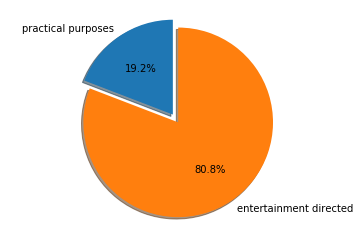

In [27]:
pie_chart(prime_genre_freq_table, "apple")

As shown by the pie chart, **80.8%** of the apps are for **entertainment purposes**, dominating the market over the apps directed for more practical purposes.

### PART 2: Google Play Store Data set

In [28]:
print("Category frequency table of the google dataset:") 
category_freq_table = freq_table(google_free_apps, "Category")

print("\nGenres frequency table of the google dataset:") 
genres_freq_table = freq_table(google_free_apps, "Genres")

Category frequency table of the google dataset:
FAMILY | 18.9383561644
GAME | 9.65753424658
TOOLS | 8.48173515982
BUSINESS | 4.64611872146
PRODUCTIVITY | 3.93835616438
LIFESTYLE | 3.91552511416
FINANCE | 3.72146118721
MEDICAL | 3.5502283105
SPORTS | 3.33333333333
PERSONALIZATION | 3.28767123288
COMMUNICATION | 3.25342465753
HEALTH_AND_FITNESS | 3.09360730594
PHOTOGRAPHY | 2.97945205479
NEWS_AND_MAGAZINES | 2.80821917808
SOCIAL | 2.64840182648
TRAVEL_AND_LOCAL | 2.3401826484
SHOPPING | 2.24885844749
BOOKS_AND_REFERENCE | 2.14611872146
DATING | 1.86073059361
VIDEO_PLAYERS | 1.80365296804
MAPS_AND_NAVIGATION | 1.38127853881
FOOD_AND_DRINK | 1.23287671233
EDUCATION | 1.17579908676
ENTERTAINMENT | 0.958904109589
AUTO_AND_VEHICLES | 0.924657534247
LIBRARIES_AND_DEMO | 0.901826484018
HOUSE_AND_HOME | 0.787671232877
WEATHER | 0.787671232877
EVENTS | 0.719178082192
ART_AND_DESIGN | 0.650684931507
PARENTING | 0.639269406393
BEAUTY | 0.60502283105
COMICS | 0.582191780822

Genres frequency table o

For the Google Play Store data set, the **analysis will be more directed towards the category attribute**, since it has an uniquevetely correspondence with each app on the data set, whereas the genre attribute could have multiple correspondences with an app on the data set. Furthermore, the Genres attribute gives rise to a more disperse distribution of the data, difficulting the recognition and generalization of patterns. 

Analyzing the relative representativeness of the existing categories, it has been discriminated that the **'Family' Category** is the **most representative (approximately 19%)** on the filtered Google Play Store data set. However, 'Family' is an ambiguous categorization for app genres, that can have both practical and entertainment applications. For this analysis, it was considered that this category is encapsulated on the apps with entertainment purposes. Given this, the generated pie chart is the following: 

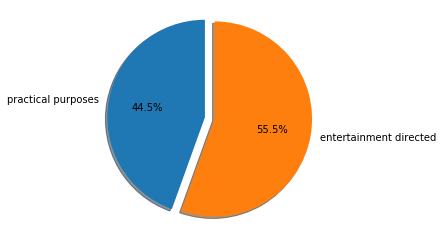

In [29]:
pie_chart(category_freq_table, "google")

As captured by the above pie chart, the relative representativeness of the two considered usage purposes is, aproximately, uniformly distributed, having a more balanced landscape of both practical and fun apps in comparison to the Apple Store data set. 

Given the pre-processing filtering steps applied on both data sets, the achieved conclusions should not be extended beyond the initially imposed analysis' scope (free and English apps). If the data sets were analyzed as a whole, the extracted patterns could be different. Additionally, the meaning of the extracted patterns must be clarified: the performed analysis only categorizes the existing genres and quantifies their representativeness on the respective filtered data set, without generating any knowledge on genres' popularity, that is, what genres have the most users.

### Apps Popularity by Genre

As a measure of **users engagement** towards any group of apps, produced by some categorization (for example, by genre), the number of **installs seems suitable**. As more installs are completed, more users are reachable to ads-exposement, contributing to the augmentation of that genre popularity. 

Therefore, for **quantifying apps popularity**, it was delineated a strategy that calculates the average number of installs for each app genre. For the Google Play Store data set, this information is encapsulated by the **Installs attribute**, althought being **low precise** due to its representation, with most of the values being open-ended (100+, 1,000+, 5,000+, etc.). However, very precise data isn't critical for the aimed purposes — the principal aim is to find out which app genres attract the most users, not requering perfect precision with respect to the number of users.

In [37]:
print("- Installs frequency table on google dataset:")
installs_freq_table = freq_table(google_free_apps, "Installs")

- Installs frequency table on google dataset:
1,000,000+ | 15.7420091324
100,000+ | 11.5182648402
10,000,000+ | 10.6050228311
10,000+ | 10.2054794521
1,000+ | 8.36757990868
100+ | 6.95205479452
5,000,000+ | 6.87214611872
500,000+ | 5.54794520548
50,000+ | 4.77168949772
5,000+ | 4.48630136986
10+ | 3.51598173516
500+ | 3.20776255708
50,000,000+ | 2.28310502283
100,000,000+ | 2.13470319635
50+ | 1.92922374429
5+ | 0.787671232877
1+ | 0.513698630137
500,000,000+ | 0.27397260274
1,000,000,000+ | 0.228310502283
0+ | 0.0456621004566
1.000.000+ | 0.0114155251142


Relative to the **App Store data set**, the said information is missing. As an alternative, it will be taken the **total number of user ratings as a proxy**, being encapsulated by the **rating_count_tot attribute**. The methodology for the App Store data set is more likely to **underestimate the true number of installs**, due to the fact that is more probable that one instalation doesn't have associated an avaliation rating. Less likely, an overestimate can be produced if an avaliation rating isn't performed by someone that has install the app. However, unlike the Installs attribute for the Google Play Store data set, the rating_count_tot attribute as **high precision**, being incremented each time a new avaliation rating is performed and enter into the data set.

The strategy described above was transformed into an algorithm - `genres_popular_average()` -, which performs the following: 
- Isolates the apps of each genre, discriminated into the previously generated frequency table (`freq_genre_table` **input parameter**), creating a dictionary that has as keys the different app genres; 
- For each genre, the number of installations or the total number of ratings is iteratively added, being this achieved by specifying the corresponding app attribute into the `propritie` **input parameter**, tunning the analysis for the wanted data set, with the last being specified as a list of dictionaries into the `dataset` **input parameter**. For successfully performing this computations without raise an error, it's necessary to remove the commas, ',', and the plus, '+', characters of each install number string, being done by replacing the ',' and the '+' characters by the empty string, '', becoming the resulted install number string convertible into a float;
- Dividing the resulted sum by the number of apps belonging to that genre (not by the total number of apps), assigning into the respective dictionary entry.

As previously provided, it's switchable the capibality of determined the order at which the results are saved (`descending` **input parameter**, being set to True by default, implementing the algorithm for descent sorting), as well as the possibility to display them (`display_table` **input parameter**, implementing its displayability - True, as default). The sorted table is returned as **output** - `sorted_table`.

In [40]:
def genres_popular_average(dataset, freq_genre_table, propritie, descending = True, display_table = True):
    
    genres_popular_average = {}
    
    for genre in freq_genre_table: 
        popularity = 0.0 
        total_num_genre = 0.0 
        genre = genre[0]

        for app in dataset: 
            if genre not in app.values():
                continue
            
            if propritie == "Installs":
                value = app[propritie].replace("+", "")
                value = value.replace(",", "")
            else:
                value = app[propritie]
                
            popularity += float(value)
            total_num_genre += 1
           
        genres_popular_average[genre] = popularity / total_num_genre
    
    sorted_table = sorted(genres_popular_average.items(), key = lambda item: item[1], reverse = descending)
    
    if display_table:
        display(sorted_table)
        
    return sorted_table

The **average popularity per genre**, altought being an easy way for summarizing the information of users engangement, is highly **influenced by outliers**, which make niches that dominate the market. For inspecting the **popularity distribution per genre**, it was designed an algorithm - `popularity_app_discrimination()` - that discriminates the popularity (number of installs or rating counting) of the `max_analyzed` most popular apps per genre (genres are discriminated on the previously generated table of average popularity per genre - input argument `genres_popular_avg`) on the given data set, with the last being specified by **two input parameters**: `dataset` - list of dictionaries - and `dataset_flag` - string that can have two possible forms, "google" or "apple".

In [31]:
def popularity_app_discrimination(dataset, dataset_flag, genres_popular_avg, max_analyzed):
    
    if dataset_flag == "google":
        name = "App"
        propritie = "Installs"
    elif dataset_flag == "apple":
        name = "track_name"
        propritie = "rating_count_tot"
        
    for genre in genres_popular_avg:
        genre = genre[0]
        apps_genre = {}
        
        for app in dataset:
            if genre not in app.values():
                continue
            
            app_name = app[name]
            
            if propritie == "Installs":
                value = app[propritie].replace("+", "")
                value = value.replace(",", "")
            else:
                value = app[propritie]
                
            apps_genre[app_name] = int(value)
            
            
        print("- For the genre \'" + genre + "\', the first " + str(max_analyzed) + " most popular apps have the following engangement on rating counting:")
        sorted_table = sorted(apps_genre.items(), key = lambda item: item[1], reverse = True)
        
        display(sorted_table[:max_analyzed])
        print("\n")

Aiming a more truthful **estimation of genre's popularity**, it could be valuable establishing a **threshold for filtering large outliers**. For reaching that, it was designed an algorithm - `filtering_outliers()` - that considers the subset `dataset` to which were isolated the English and free apps, filtering it according to the established `thresholds`, which takes the form of an array - **[low_threshold, high_threshold]** -, isolating the apps that have installations or user ratings over the **low_threshold** and less than the **high_threshold**. As a result of the filtering, it's obtained a **new array of dictionaries** - `filtered_dataset`, returned as an **output**,  - to which is **applied the algorithm** `genres_popular_average()`, which **estimates the average popularity** according to the number of installations or user ratings, being arranged into an array - `new_estimates`, returned as **output**. 

Additionally, for offering a perspective of how the new popularity estimate evolved in relation to the first estimate (the **first popularity estimates per genre** are specified by the `table_genres_popular_avg` **input parameter**), it's calculated the **proportionality of the old estimate in relation to the new estimate**, being these values arranged into an array `diff_relative_popularity`, returned as an **output** -, being the displayability of these results switchable by the `display_diff` **input parameter**.

In [148]:
def filtering_outliers(dataset, dataset_flag, freq_genre_table, table_genres_popular_avg, thresholds, descending = True, display_table = False, display_diff = False):    
    
    filtered_dataset = []
    
    if dataset_flag == "google":
        propritie = "Installs"
    elif dataset_flag == "apple":
        propritie = "rating_count_tot"
        
    for app in dataset:
        if propritie == "Installs":
            value = app[propritie].replace("+", "")
            value = value.replace(",", "")
        else:
            value = app[propritie]
                
        installs_value = float(value)
        
        low_threshold = thresholds[0]
        high_threshold = thresholds[1]
            
        if installs_value <= high_threshold and installs_value >= low_threshold:
            filtered_dataset.append(app)    
    
    new_popularity = genres_popular_average(filtered_dataset, freq_genre_table, propritie, descending, display_table) 
                
    diff_relative_popularity = {} 
    for genre_new in new_popularity:
        name = genre_new[0]
        popular_new = genre_new[1]
            
        for genre_old in table_genres_popular_avg:
            if genre_old[0] == name:
                popular_old = genre_old[1]
                break
            
        diff_relative_popularity[name] = popular_old / popular_new
        
    if display_diff:
        print("\n- The proportion between the first popularity estimate and the new estimate, resulted from outlier " + 
              "filtering apps that have over " + str(thresholds[1]) + " and higher than " + str(thresholds[0]) + 
              " installs or user ratings, is:\n")
        sorted_table = sorted(diff_relative_popularity.items(), key = lambda item: item[1], reverse = True)

        display(sorted_table)   
    
    return filtered_dataset, new_popularity, diff_relative_popularity

If desired, the analysis performed by the previous function can be resumed to a certain genre. In that sense, it was designed an algorithm that takes an array of the new popularity estimates - specified by the `new_popularity` **input parameter** - and displays only the value correspondent to the selected genre - specified by the `app_genre` **input parameter**. As before, the displayability of the proportionality between the old and new estimates is switchable by the `display_diff` **input parameter**, being the value corresponding to the intended genre accessed through the array containing these proportions for all genres - specified by the `diff_relative_popularity` **input parameter**. As means for displayability, it's specified, as done before, the same established `thresholds`. 

In [144]:
def genre_(app_genre, new_popularity, thresholds, diff_relative_popularity, display_diff = True):
    
    genre_subset = []
    print("\n- New popularity estimate for the " + app_genre + " genre:")
    for genre in new_popularity:
        if genre[0] == app_genre:
            print(genre[1])
            break 
    
    if display_diff:
        print("\n- For the " + app_genre + " genre, the propotion between the first popularity estimate and the new " + 
                  "estimate, resulted from outlier filtering of the apps that have over " + str(thresholds[1]) + 
                  " and higher than " + str(thresholds[0]) + " installs or user ratings, is:\n" 
                  + str(diff_relative_popularity[app_genre]))

### PART 1: Apple Store Data set

In [32]:
print("- Popularity of prime_genre on apple dataset:")
genres_popular_avg_apple = genres_popular_average(apple_free_apps, prime_genre_freq_table, "rating_count_tot")

max_analyzed = 6
print("\n\nDiscrimination of the " + str(max_analyzed) + " most popular apps per genre on the apple dataset:\n")
popularity_app_discrimination(apple_free_apps, "apple", genres_popular_avg_apple, max_analyzed)

- Popularity of prime_genre on apple dataset:
Navigation | 86090.3333333
Reference | 79350.4705882
Social Networking | 72916.5480769
Music | 58205.0307692
Weather | 54215.2962963
Book | 46384.9166667
Food & Drink | 33333.9230769
Finance | 32367.0285714
Travel | 31358.5
Photo & Video | 28441.54375
Shopping | 27816.2
Health & Fitness | 24037.6349206
Games | 23009.9271452
Sports | 23008.8985507
Productivity | 21799.1481481
News | 21750.0714286
Utilities | 19900.4736842
Lifestyle | 16739.3469388
Entertainment | 14364.7741935
Business | 7491.11764706
Education | 7003.98305085
Catalogs | 4004.0
Medical | 612.0


Discrimination of the 6 most popular apps per genre on the apple dataset:

- For the genre 'Navigation', the first 6 most popular apps have the following engangement on rating counting:
Waze - GPS Navigation, Maps & Real-time Traffic | 345046
Google Maps - Navigation & Transit | 154911
Geocaching® | 12811
CoPilot GPS – Car Navigation & Offline Maps | 3582
ImmobilienScout24: Real Esta

From the subgroup of free and English apps on the **Apple Store data set**, by considering the **apps genre popularity**, the **app profile** that emerges as the **better recommendation for development** is one that falls into the **'Navigation' genre**, having aproximatelly **86,000 user ratings on average**. However, by analyzing the **6 most popular Navigation apps**, it's verified that the **average popularity** of this genre is **highly influenced** by the **Waze and Google Maps apps**, which **make together approximatelly half a million user reviews**. This evidence lowers the intrinsic potential engangement that the 'Navigation' genre appeared to initially have. 

Right after on the popularity average, there is the **Reference apps**, which have aproximatelly **80,000 user ratings on average**. Like previously denoted, it's observed the **pattern of some apps that skew up the average of user ratings**, being this time associated to the **Bible and Dictionary.com**. The same pattern applies to **Social Networking apps**, where the **average number is highly influenced by a few dominate apps, like Facebook, Pinterest, Skype, etc**. Same applies to **Music apps**, where a few big players, like **Pandora, Spotify and Shazam, heavily influence the average number**. 

The aim of this analysis is to find popular genres, but it seems that **navigation, social networking or music apps have initially be considered more popular than they really are**. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, dominating the respective market over the **reminescent apps that are mostly bellow the 10,000 threshold**. Moreover, these niches seem to be **dominated by a few giants who are hard to compete against**. A more in-depth insite about the intrinsic potential engangement of this genres could be captured by **removing those extremely popular apps, for each genre, and posteriorly restimate the averages**. 

Something worth denoting is the fact that the **'Games' genre seems to have a more uniform popularity distribution**, with **less proimence of outliers** on the user ratings' average. However, as previously found by the **Most Common Apps analysis on the Apple data set**, the market subset composed of **apps for entertainment directed seems somehow saturated**, being possibly beneficial to recommend a more distinct app recommendation, if possible. As an alternative, an **investment on the development on a more practical app could be rewarding**. Conciliating with the p**otential of the 'References' genre**, it can be managed the selection of a popular book, making its digitalization and embed with additional features, like daily quotes from the book, an audio version of the book, quizzes about the book, dictionary of words within the book, etc. The goal would be to develop an interactive experience related to the book, integrating, as much as possible, features that are treated seperatly by different apps, in order to remove the necessity of exiting the app and acess other external app.  

Regarding other genres, the **weather, book, food and drink or finance genres** are also at the **top of the most popular apps by an average of user ratings**. The book genre could be considered as overlapping with the app recommendation described above. The remaining genres don't seem too promising: 
- **Weather apps** — the users' time exposement is expectably low, reducing the probability of making a profit from in-app adds. Also, getting reliable live weather data may requiring the connection to external non-free of payment entities;
- **Food and drink** — the most popular apps (Starbucks, Dunkin' Donuts, McDonald's) are mainly related to cooking and delivery services, falling outside the intended app profile;
- **Finance apps** — these apps require financial expertise domain, being necessary to include a finance expert in the app development process.

### PART 2: Google Play Store Data set

The ultimate goal is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play markets. For that, it will be nextly analyzed the results for the **Google Play data set**, trying to conciliate the observed patterns with the previously denoted on the Apple Store data set, in order to present an app profile recommendation for development. 

In [44]:
print("- Popularity of Category on google dataset:")
category_popular_avg_google = genres_popular_average(google_free_apps, category_freq_table, "Installs")

max_analyzed = 10
print("\n\nDiscrimination of the " + str(max_analyzed) + " most popular apps per genre on the google dataset:\n")
popularity_app_discrimination(google_free_apps, "google", category_popular_avg_google, max_analyzed)

- Popularity of Category on google dataset:
COMMUNICATION | 38550548.0386
VIDEO_PLAYERS | 24878048.8608
SOCIAL | 23628689.2328
PHOTOGRAPHY | 17840110.4023
PRODUCTIVITY | 16787331.3449
GAME | 15571586.6903
TRAVEL_AND_LOCAL | 14120454.078
ENTERTAINMENT | 11767380.9524
TOOLS | 10902378.8345
NEWS_AND_MAGAZINES | 9626407.35772
BOOKS_AND_REFERENCE | 8329168.93617
SHOPPING | 7103190.7868
PERSONALIZATION | 5240358.98611
WEATHER | 5212877.10145
HEALTH_AND_FITNESS | 4219697.05535
MAPS_AND_NAVIGATION | 4115374.21488
SPORTS | 3750580.64384
FAMILY | 3716656.52803
ART_AND_DESIGN | 1986335.08772
FOOD_AND_DRINK | 1951283.80556
EDUCATION | 1833495.14563
BUSINESS | 1712290.14742
LIFESTYLE | 1447458.97668
HOUSE_AND_HOME | 1385541.46377
FINANCE | 1365500.40491
DATING | 861409.552147
COMICS | 859042.156863
AUTO_AND_VEHICLES | 654074.82716
LIBRARIES_AND_DEMO | 649314.050633
PARENTING | 552875.178571
BEAUTY | 513151.886792
EVENTS | 253542.222222
MEDICAL | 121161.877814


Discrimination of the 10 most popular

- For the genre 'LIFESTYLE', the first 10 most popular apps have the following engangement on rating counting:
Tinder | 100000000
Samsung+ | 50000000
H&M | 10000000
Been Together (Ad) - D-day | 10000000
Daily Horoscope | 10000000
Rate Guide Bill Letter | 10000000
iHoroscope - 2018 Daily Horoscope & Astrology | 10000000
Diary with lock | 10000000
Mirror | 10000000
Zara | 10000000


- For the genre 'HOUSE_AND_HOME', the first 10 most popular apps have the following engangement on rating counting:
Realtor.com Real Estate: Homes for Sale and Rent | 10000000
tinyCam Monitor FREE | 10000000
Zillow: Find Houses for Sale & Apartments for Rent | 10000000
Trulia Real Estate & Rentals | 10000000
Houzz Interior Design Ideas | 10000000
Alfred Home Security Camera | 5000000
Trulia Rent Apartments & Homes | 5000000
Real Estate sale & rent Trovit | 5000000
DaBang - Rental Homes in Korea | 5000000
ColorSnap® Visualizer | 1000000


- For the genre 'FINANCE', the first 10 most popular apps have the follo

The obtained results show that, on average, **communication apps are the most popular on the english and free apps subset of the Google Play Store data set**, having aproximatelly the **average of 38,550,548 installs**. However, this result is **heavily skewed up** by a few **apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts)**, and a **few others with over 100 and 500 million installs**. In order to reach a **more truthful estimation of the popularity of communication apps**, it was **filtered from the communication apps the ones that have equal or over 100 million installs**, being expected that the popularity estimate will significantly lower. 

In [151]:
thresholds = [0, 99999999]

google_filtered_outlier, google_new_popularity, google_diff_relative_popularity = filtering_outliers(google_free_apps, "google", category_freq_table, category_popular_avg_google, thresholds)
genre_("COMMUNICATION", google_new_popularity, thresholds, google_diff_relative_popularity)


- New popularity estimate for the COMMUNICATION genre:
3437620.89535

- For the COMMUNICATION genre, the propotion between the first popularity estimate and the new estimate, resulted from outlier filtering of the apps that have over 99999999 and higher than 0 installs or user ratings, is:
11.2143104816


As demonstrated by the above results, the **communication apps reduce their estimate popularity by roughly 11 times**, in comparation with the first estimate that accounted large outliers. 

The next estimate runner-up, **video players category**, has **24,878,048 average installs**. The market is **dominated by apps like Youtube, Google Play Movies & TV, or MX Player**. The pattern is repeated for **social apps (where we have giants like Facebook, Instagram, Google+, etc.)**, **photography apps (Google Photos and other popular photo editors)**, or **productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.)**. Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against. 

The **books and reference category** looks fairly popular as well, with an **average number of installs of 8,329,168**. It's interesting to **explore this in more depth**, since it was found that **this genre has some potential to be profitable on the App Store**, being the ultimate goal to recommend an app genre that shows potential for being profitable on both the App Store and Google Play. 

In [153]:
print("\n- Explorying the subset of books_and_reference category, on the google play store data set:\n")
explore_data(google_free_apps, "google", 0, len(google_free_apps), "Installs", "BOOKS_AND_REFERENCE")


- Explorying the subset of books_and_reference category, on the google play store data set:

E-Book Read - Read Book for free: 50,000+
Download free book with green book: 100,000+
Wikipedia: 10,000,000+
Cool Reader: 10,000,000+
Free Panda Radio Music: 100,000+
Book store: 1,000,000+
FBReader: Favorite Book Reader: 10,000,000+
English Grammar Complete Handbook: 500,000+
Free Books - Spirit Fanfiction and Stories: 1,000,000+
Google Play Books: 1,000,000,000+
AlReader -any text book reader: 5,000,000+
Offline English Dictionary: 100,000+
Offline: English to Tagalog Dictionary: 500,000+
FamilySearch Tree: 1,000,000+
Cloud of Books: 1,000,000+
Recipes of Prophetic Medicine for free: 500,000+
ReadEra – free ebook reader: 1,000,000+
Anonymous caller detection: 10,000+
Ebook Reader: 5,000,000+
Litnet - E-books: 100,000+
Read books online: 5,000,000+
English to Urdu Dictionary: 500,000+
eBoox: book reader fb2 epub zip: 1,000,000+
English Persian Dictionary: 500,000+
Flybook: 500,000+
All Maths

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a **small number of extremely popular apps that skew the average** like the **Google Play Books, Audiobooks from Audible and the Bible**. However, it looks like there are only a few very popular apps, so this market still shows potential. Nextly, it will be tried to **extract some app profile ideas**, based on the kind of apps that can be considered to have **middle-level popularity (between 1,000,000 and 50,000,000 downloads)**:

In [155]:
thresholds = [1000000, 50000000]

google_filtered_outlier, google_new_popularity, google_diff_relative_popularity = filtering_outliers(google_free_apps, "google", category_freq_table, category_popular_avg_google, thresholds)
genre_("BOOKS_AND_REFERENCE", google_new_popularity, thresholds, google_diff_relative_popularity, display_diff = False)

print("\n- Explorying the subset of books_and_reference category, on the google play stor data set, with downloads between 1,000,000 and 50,000,000:\n")
explore_data(google_filtered_outlier, "google", 0, len(google_filtered_outlier), "Installs", "BOOKS_AND_REFERENCE")


- New popularity estimate for the BOOKS_AND_REFERENCE genre:
5312500.0

- Explorying the subset of books_and_reference category, on the google play stor data set, with downloads between 1,000,000 and 50,000,000:

Wikipedia: 10,000,000+
Cool Reader: 10,000,000+
Book store: 1,000,000+
FBReader: Favorite Book Reader: 10,000,000+
Free Books - Spirit Fanfiction and Stories: 1,000,000+
AlReader -any text book reader: 5,000,000+
FamilySearch Tree: 1,000,000+
Cloud of Books: 1,000,000+
ReadEra – free ebook reader: 1,000,000+
Ebook Reader: 5,000,000+
Read books online: 5,000,000+
eBoox: book reader fb2 epub zip: 1,000,000+
All Maths Formulas: 1,000,000+
Ancestry: 5,000,000+
HTC Help: 10,000,000+
Moon+ Reader: 10,000,000+
English-Myanmar Dictionary: 1,000,000+
Golden Dictionary (EN-AR): 1,000,000+
All Language Translator Free: 1,000,000+
Aldiko Book Reader: 10,000,000+
Dictionary - WordWeb: 5,000,000+
50000 Free eBooks & Free AudioBooks: 5,000,000+
Al-Quran (Free): 10,000,000+
Al Quran Indonesi

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps, since there'll be some significant competition. It was also denoted that there are quite a **few apps built around the book Quran**, which suggests that **building an app that focuses on a popular book can be profitable**. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. However, it looks like the **market is already full of libraries**, so we **need to add some special features** besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

# Conclusion

In this project, it was analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets. It was concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.